In [1]:
'''
Problem 1
'''

import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.nn.modules.loss import MSELoss
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

alpha = 0.1
K = 1000
B = 128
N = 512

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

def f_true(x) :
    return (x-2) * np.cos(x*4)

np.random.seed(0)
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train)
X_val = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N//5), dtype=torch.float32)
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=N)

'''
unsqueeze(1) reshapes the data into dimension [N,1],
where is 1 the dimension of an data point.

The batchsize of the test dataloader should not affect the test result
so setting batch_size=N may simplify your code.
In practice, however, the batchsize for the training dataloader
is usually chosen to be as large as possible while not exceeding
the memory size of the GPU. In such cases, it is not possible to
use a larger batchsize for the test dataloader.
'''

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 64)
        self.l2 = nn.Linear(64, 64)
        self.l3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        x = self.l3(x)
        return x

In [47]:
model = MLP()
model.l1.weight.data = torch.normal(0, 1, model.l1.weight.shape)
model.l1.bias.data = torch.full(model.l1.bias.shape, 0.03)
model.l2.weight.data = torch.normal(0, 1, model.l2.weight.shape)
model.l2.bias.data = torch.full(model.l2.bias.shape, 0.03)
model.l3.weight.data = torch.normal(0, 1, model.l3.weight.shape)
model.l3.bias.data = torch.full(model.l3.bias.shape, 0.03)
model = model.to(device)

loss_function = MSELoss()
optimizer = optim.SGD(model.parameters(), lr=alpha)

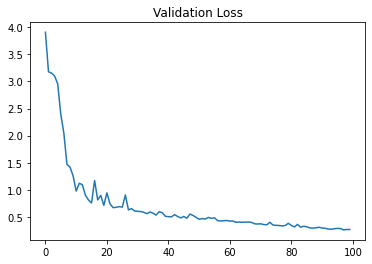

In [7]:
val_loss = []

for epoch in range(K):
    for X_test, y_test in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(X_test.to(device)), y_test.to(device))
        train_loss.backward()
        optimizer.step()
    
    if epoch % 10 == 9:
        val_loss_batch = 0
        for X_val, y_val in test_dataloader:
            val_loss_batch += loss_function(model(X_val.to(device)), y_val.to(device))
        val_loss.append(val_loss_batch)

plt.plot(range(10, 1001, 10), val_loss)
plt.title("Validation Loss")
plt.show()

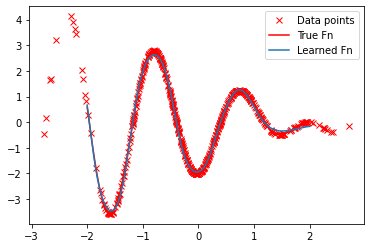

In [8]:
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model.to(torch.device("cpu"))(xx),label='Learned Fn')
plt.legend()
plt.show()

In [32]:
'''
Problem 2
'''
count = 0
for parameter in model.parameters():
    count += len(parameter.view(-1))
print("The number of trainable parameter is {}".format(count))

The number of trainable parameter is 4353


In [34]:
def f_true(x) :
    return (x-2) * np.cos(x*4)

np.random.seed(0)
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape)
X_val = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N//5), dtype=torch.float32)
y_val = f_true(X_val) + torch.normal(0, 0.5, X_val.shape)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=N)

In [48]:
model = MLP()
model.l1.weight.data = torch.normal(0, 1, model.l1.weight.shape)
model.l1.bias.data = torch.full(model.l1.bias.shape, 0.03)
model.l2.weight.data = torch.normal(0, 1, model.l2.weight.shape)
model.l2.bias.data = torch.full(model.l2.bias.shape, 0.03)
model.l3.weight.data = torch.normal(0, 1, model.l3.weight.shape)
model.l3.bias.data = torch.full(model.l3.bias.shape, 0.03)
model = model.to(device)

loss_function = MSELoss()
optimizer = optim.SGD(model.parameters(), lr=alpha)

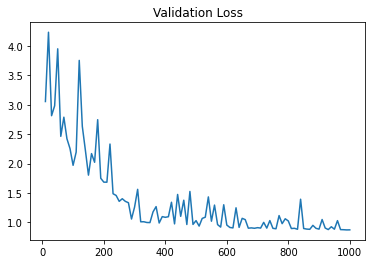

In [49]:
val_loss = []

for epoch in range(K):
    for X_test, y_test in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(X_test.to(device)), y_test.to(device))
        train_loss.backward()
        optimizer.step()
    
    if epoch % 10 == 9:
        val_loss_batch = 0
        for X_val, y_val in test_dataloader:
            val_loss_batch += loss_function(model(X_val.to(device)), y_val.to(device))
        val_loss.append(val_loss_batch)

plt.plot(range(10, 1001, 10),  val_loss)
plt.title("Validation Loss")
plt.show()

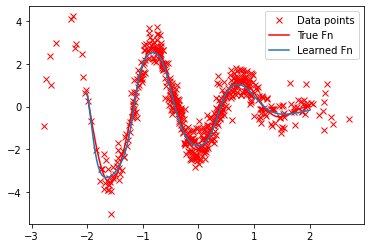

In [50]:
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model.to(torch.device("cpu"))(xx),label='Learned Fn')
plt.legend()
plt.show()

In [ ]:
print("In this case, the training loss decrease slowly and converges to higher value than before. Also, slight difference is observed between the true function and learned function")